# CAPP 30254 Machine Learning for Public Policy - Spring 2019
# HW1 Assignment 1: Diagnostic | Nora Hajjar | Due 4/9/19
# WRITEUP: https://docs.google.com/document/d/1JAAsMuWR1ytGTjETEBBFHlt8IDG9uzxFwc5u_msdzcg/edit

________________________

## Problem 1: Data Acquisition and Analysis
### This problem deals with crime reporting data from Chicago. Your task is to download data about Crime Reports from the Chicago Open Data Portal and analyze it to better understand what type of crimes get reported in what (type of) neighborhoods.

### Task 1: Download reported crime data from the Chicago open data portal for 2017 and 2018.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_2017 = pd.read_json("https://data.cityofchicago.org/resource/6zsd-86xi.json?year=2017&$limit=600000")
df_2017_orig = pd.read_json("https://data.cityofchicago.org/resource/6zsd-86xi.json?year=2017&$limit=600000")
df_2018 = pd.read_json("https://data.cityofchicago.org/resource/6zsd-86xi.json?year=2018&$limit=600000")
df = df_2017_orig.append(df_2018)

In [6]:
df.head()

arrest  beat                    block case_number  community_area  \
0    True  1034  026XX S CALIFORNIA BLVD    JA529032            30.0   
1    True  1221  007XX N SACRAMENTO BLVD    JA545986            23.0   
2   False  2222       092XX S RACINE AVE    JB147188            73.0   
3   False   835          026XX W 79TH ST    JB147595            70.0   
4   False   313     060XX S EBERHART AVE    JB147230            42.0   

                 date                            description  district  \
0 2017-11-28 21:43:00  VIOLENT OFFENDER: ANNUAL REGISTRATION      10.0   
1 2017-12-11 19:15:00                         ARMED: HANDGUN      12.0   
2 2017-10-08 03:00:00                         NON-AGGRAVATED      22.0   
3 2017-03-28 14:00:00                         UNLAWFUL ENTRY       8.0   
4 2017-09-09 20:17:00                              OVER $500       3.0   

   domestic fbi_code  ...    latitude  \
0     False       26  ...   41.843778   
1     False       03  ...   41.894476   
2     False       02  ...         NaN   
3     False       05  ...         NaN   
4     False       06  ...         NaN   

                                            location     location_description  \
0  {'type': 'Point', 'coordinates': [-87.69463767...  JAIL / LOCK-UP FACILITY   
1  {'type': 'Point', 'coordinates': [-87.70216915...                 SIDEWALK   
2                                                NaN                RESIDENCE   
3                                                NaN                    OTHER   
4                                                NaN                RESIDENCE   

   longitude         primary_type               updated_on  ward x_coordinate  \
0 -87.694638        OTHER OFFENSE  2018-02-11T15:54:58.000  12.0    1158280.0   
1 -87.702169              ROBBERY  2018-02-11T15:54:58.000  27.0    1156092.0   
2        NaN  CRIM SEXUAL ASSAULT  2018-02-11T15:57:41.000  21.0          NaN   
3        NaN             BURGLARY  2018-02-11T15:57:41.000  18.0          NaN   
4        NaN                THEFT  2018-02-11T15:57:41.000  20.0          NaN   

   y_coordinate  year  
0     1886310.0  2017  
1     1904769.0  2017  
2           NaN  2017  
3           NaN  2017  
4           NaN  2017  

[5 rows x 22 columns]

### Task 2: Generate summary statistics for the crime reports data including but not limited to number of crimes of each type, how they change over time, and how they are different by neighborhood. Please use a combination of tables and graphs to present these summary stats.

In [7]:
# number of crimes of each type
df.groupby(["primary_type", "year"]).size().sort_values(ascending=False)

primary_type                       year
THEFT                              2018    65082
                                   2017    64346
BATTERY                            2018    49781
                                   2017    49214
CRIMINAL DAMAGE                    2017    29042
                                   2018    27806
ASSAULT                            2018    20377
                                   2017    19303
DECEPTIVE PRACTICE                 2017    19028
                                   2018    18736
OTHER OFFENSE                      2017    17227
                                   2018    17130
BURGLARY                           2017    13000
NARCOTICS                          2018    12988
ROBBERY                            2017    11877
BURGLARY                           2018    11730
NARCOTICS                          2017    11658
MOTOR VEHICLE THEFT                2017    11406
                                   2018     9988
ROBBERY                      

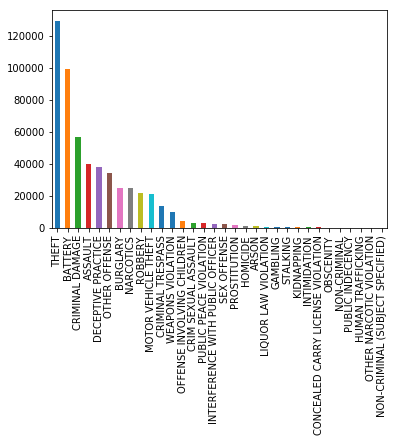

In [8]:
# plot number of crimes of each type - total
df['primary_type'].value_counts().plot(kind = 'bar')

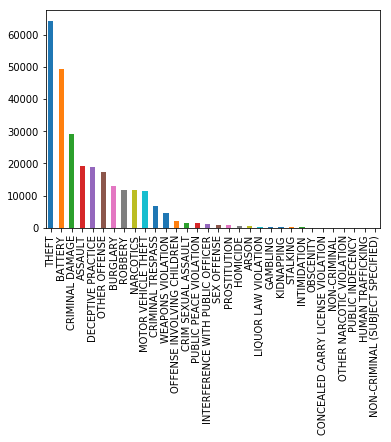

In [15]:
# how crimes change over time - 2017
df_2017_orig['primary_type'].value_counts().plot(kind = 'bar')

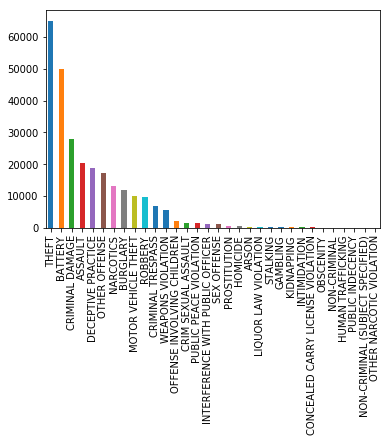

In [16]:
# how crimes change over time - 2018
df_2018['primary_type'].value_counts().plot(kind = 'bar')

In [17]:
#how crimes are different by neighborhood 
df.groupby(["primary_type", "year", "community_area"]).size().sort_values(ascending=False)

primary_type          year  community_area
THEFT                 2018  8.0               6128
                      2017  8.0               5895
                            32.0              5882
                      2018  32.0              5790
                            28.0              3601
BATTERY               2018  25.0              3376
                      2017  25.0              3346
THEFT                 2017  28.0              3343
                            24.0              3103
                      2018  24.0              2772
                            7.0               2496
                            6.0               2320
                            25.0              2302
                      2017  6.0               2262
                            7.0               2239
BATTERY               2017  43.0              2156
THEFT                 2017  25.0              2144
NARCOTICS             2018  29.0              2083
BATTERY               2018  43.0       

_______

## Problem 2: Data Augmentation and APIs
### All of the crime data you just analyzed have a block address and lat/long fields. The task now is to augment that data with American Community Survey data. For each crime report, use one of the census APIs to get some additional data (at least 3-4 useful variables) about the block or zipcode where the crime report came from. This could include information about demographics of the block or zipcode (race, income, family size, etc.). 

In [76]:
import uszipcode
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=True)
from uszipcode import Zipcode

In [77]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268096 entries, 0 to 268095
Data columns (total 22 columns):
arrest                  268096 non-null bool
beat                    268096 non-null int64
block                   268096 non-null object
case_number             268096 non-null object
community_area          268096 non-null int64
date                    268096 non-null datetime64[ns]
description             268096 non-null object
district                268095 non-null float64
domestic                268096 non-null bool
fbi_code                268096 non-null object
id                      268096 non-null int64
iucr                    268096 non-null object
latitude                264981 non-null float64
location                264981 non-null object
location_description    267037 non-null object
longitude               264981 non-null float64
primary_type            268096 non-null object
updated_on              268096 non-null object
ward                    268095 non-null

In [78]:
#drop NaN longitude and latitude before running iterrow operation
df_2017 = df_2017.dropna(subset=['longitude', 'latitude'])

In [79]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264981 entries, 0 to 268095
Data columns (total 22 columns):
arrest                  264981 non-null bool
beat                    264981 non-null int64
block                   264981 non-null object
case_number             264981 non-null object
community_area          264981 non-null int64
date                    264981 non-null datetime64[ns]
description             264981 non-null object
district                264980 non-null float64
domestic                264981 non-null bool
fbi_code                264981 non-null object
id                      264981 non-null int64
iucr                    264981 non-null object
latitude                264981 non-null float64
location                264981 non-null object
location_description    264178 non-null object
longitude               264981 non-null float64
primary_type            264981 non-null object
updated_on              264981 non-null object
ward                    264980 non-null

In [80]:
#WARNING: THIS IS A TIME INTENSIVE RUN - ONLY RUN ONCE. TAKES 30+ MINUTES TO RUN, but does work. 
df_2017['zipcode'] = df_2017.apply(lambda x: search.by_coordinates(x['latitude'],
x['longitude'],returns=1)[0].zipcode, axis=1)

In [81]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264981 entries, 0 to 268095
Data columns (total 23 columns):
arrest                  264981 non-null bool
beat                    264981 non-null int64
block                   264981 non-null object
case_number             264981 non-null object
community_area          264981 non-null int64
date                    264981 non-null datetime64[ns]
description             264981 non-null object
district                264980 non-null float64
domestic                264981 non-null bool
fbi_code                264981 non-null object
id                      264981 non-null int64
iucr                    264981 non-null object
latitude                264981 non-null float64
location                264981 non-null object
location_description    264178 non-null object
longitude               264981 non-null float64
primary_type            264981 non-null object
updated_on              264981 non-null object
ward                    264980 non-null

In [114]:
#for merging purposes
import requests
request_obj = requests.get('https://api.census.gov/data/2017/acs/acs5/?get=B01003_001E,B02001_003E,B07011_001E,B15003_001E,B23025_005E,B17001_001E&for=zip code tabulation area:*')
json = request_obj.json()
df_zip_info = pd.DataFrame(json)
df_zip_info.columns = ['total_population', 'total_black', 'median_income', 'education_attainment', 'employment_status', 'poverty_status', 'zipcode']

#df_zip_info['per_bl'] = df_zip_info['total_black'] / df_zip_info['total_population']

df_zip_info

#still need to id the most useful metrics and apply properly

total_population  total_black median_income education_attainment  \
0          B01003_001E  B02001_003E   B07011_001E          B15003_001E   
1                17599          120          None                11869   
2                39209         1092          None                27525   
3                50135         1985          None                34991   
4                 6304          160          None                 4346   
5                27590          845          None                19230   
6                62566         3079          None                43237   
7                10687          469          None                 7817   
8                24508          720          None                16670   
9                 7405           20          None                 5491   
10               42321         1050          None                29619   
11               23238          822          None                15383   
12               32936          652          None                22790   
13                1555            0          None                 1205   
14               23610          704          None                16300   
15               17202          145          None                11706   
16               28332          503          None                19655   
17               38008         4833          None                25569   
18                5610           83          None                 4148   
19               14664          352          None                 9669   
20                3681           63          None                 2466   
21               11717          389          None                 7811   
22               19546          416          None                13318   
23               40978          258          None                28694   
24               16474          486          None                12029   
25               41341         2099          None                28906   
26               15396          116          None                10086   
27               24089          240          None                17103   
28               26510          154          None                18435   
29                8797           66          None                 6021   
...                ...          ...           ...                  ...   
33091              299            0         15694                  160   
33092              119            0         16771                   74   
33093              395            0         27679                  202   
33094                7            0    -666666666                    7   
33095              172            0         20556                   85   
33096            30179          335         42289                20809   
33097              540           50         23973                  387   
33098             2255            8         43750                 1537   
33099               89            0         37500                   84   
33100              386            0         40542                  316   
33101             2599            1         32571                 1923   
33102              828           12         23321                  605   
33103              635            4         14961                  426   
33104               94            0         29167                   82   
33105             3275           19         28169                 2179   
33106             8810           85         36712                 6168   
33107               60            0         32679                   42   
33108             1038            9         36523                  829   
33109              147            0         33068                  121   
33110            13768           75         31760                 9534   
33111               20            0    -666666666                   20   
33112              174            0         29773                  161   
33113     

In [107]:
new_df = pd.merge(df_2017, df_zip_info, how='inner', on='zipcode')
new_df

arrest  beat                    block case_number  community_area  \
0         True  1034  026XX S CALIFORNIA BLVD    JA529032              30   
1        False   912          017XX W 33RD ST    JA485151              59   
2         True  1033       022XX S WHIPPLE ST    JA118524              30   
3         True  1034        022XX S HOYNE AVE    JA100050              31   
4        False  1034   023XX S CALIFORNIA AVE    JA100092              30   
5        False  1022  015XX S CALIFORNIA BLVD    JA100291              29   
6        False  1235        015XX W CERMAK RD    JA100779              31   
7        False  1234          023XX W 19TH ST    JA101045              31   
8         True  1234          019XX W 17TH ST    JA101068              31   
9        False  1034      024XX S WESTERN AVE    JA101484              31   
10       False   912      032XX S ASHLAND AVE    JA101504              59   
11       False  1034  022XX S BLUE ISLAND AVE    JA101750              31   
12       False  1034  022XX S BLUE ISLAND AVE    JA101739              31   
13       False   912       031XX S ARCHER AVE    JA102268              59   
14       False  1234          018XX W 17TH ST    JA102279              31   
15       False  1033        030XX W CERMAK RD    JA101476              30   
16       False  1234          021XX W 18TH ST    JA102106              31   
17       False  1234      016XX S ASHLAND AVE    JA102487              31   
18       False  1235        012XX W CERMAK RD    JA102547              31   
19       False  1023    015XX S FAIRFIELD AVE    JA102679              29   
20        True  1234          020XX W 21ST PL    JA102779              31   
21       False  1022          031XX W 15TH ST    JA102990              29   
22       False  1233          015XX W 18TH PL    JA103398              31   
23       False   913          012XX W 31ST ST    JA103390              60   
24        True  1233        018XX S LOOMIS ST    JA103563              31   
25       False   913         029XX S LYMAN ST    JA103603              60   
26       False   912          019XX W 33RD ST    JA103604              59   
27        True  1034      022XX S WESTERN AVE    JA103959              31   
28        True  1034        022XX W CERMAK RD    JA103991              31   
29       False  1022       015XX S ALBANY AVE    JA104121              29   
...        ...   ...                      ...         ...             ...   
264951    True  1611       074XX N HARLEM AVE    JA318165               9   
264952   False  1611       073XX N OCONTO AVE    JA320520               9   
264953   False  1611        074XX N ODELL AVE    JA327101               9   
264954   False  1611        074XX W HOWARD ST    JA336728               9   
264955   False  1611       074XX N HARLEM AVE    JA342911               9   
264956   False  1611        077XX W HOWARD ST    JA343752               9   
264957   False  1611      075XX N OCTAVIA AVE    JA352006               9   
264958   False  1611        073XX W HOWARD ST    JA352100               9   
264959   False  1611       074XX N OCONTO AVE    JA352852               9   
264960   False  1611       073XX N OCONTO AVE    JA354477               9   
264961   False  1611      074XX N OCTAVIA AVE    JA370998               9   
264962   False  1611       074XX N HARLEM AVE    JA372694               9   
264963   False  1611       074XX N HARLEM AVE    JA386531               9   
264964   False  1611        076XX W HOWARD ST    JA390240               9   
264965   False  1611    075XX N MILWAUKEE AVE    JA397008               9   
264966   False  1611    075XX N MILWAUKEE AVE    JA397007               9   
264967   False  1611     075XX N OLEANDER AVE    JA421476               9   
264968    True  1611        073XX W HOWARD ST    JA424866               9   
264969   False  1611      074XX N OSCEOLA AVE    JA427075               9   
264970   False  1611       074XX W JARVIS AVE    JA434886               9   
2649

In [128]:
new_df_zip = new_df[new_df.zipcode == '60602']
new_df_zip

arrest  beat                    block case_number  community_area  \
151837    True  1831         005XX N STATE ST    JA447634               8   
151838   False  1834      005XX N MC CLURG CT    JA533320               8   
151839   False  1834         002XX E HURON ST    JA495298               8   
151840    True  1834     007XX N MICHIGAN AVE    JA292752               8   
151841    True   112         0000X N STATE ST    JA471990              32   
151842    True  1834          002XX E OHIO ST    JA347840               8   
151843    True  1831       0000X W HUBBARD ST    JA107873               8   
151844   False  1834          004XX N PARK DR    JA100056               8   
151845    True  1834          003XX E OHIO ST    JA100128               8   
151846    True  1834     007XX N MICHIGAN AVE    JA100179               8   
151847   False  1834      0000X E ILLINOIS ST    JA100254               8   
151848   False  1831      0000X W ILLINOIS ST    JA100241               8   
151849   False  1831       0000X W HUBBARD ST    JA100441               8   
151850   False   122          001XX W LAKE ST    JA100693              32   
151851   False  1834      005XX N COLUMBUS DR    JA100643               8   
151852   False   112         0000X S STATE ST    JA100921              32   
151853   False   122      002XX N LA SALLE ST    JA100935              32   
151854   False  1831         005XX N STATE ST    JA100934               8   
151855   False   111         001XX N STATE ST    JA100858              32   
151856    True  1831       0000X W HUBBARD ST    JA101151               8   
151857   False  1834          0000X E OHIO ST    JA101299               8   
151858   False   112         0000X N STATE ST    JA101669              32   
151859   False  1834        0000X E GRAND AVE    JA101847               8   
151860   False  1834     006XX N MICHIGAN AVE    JA101893               8   
151861   False   112    0000X E WASHINGTON ST    JA102030              32   
151862   False  1834     007XX N MICHIGAN AVE    JA101870               8   
151863   False  1834     004XX N MICHIGAN AVE    JA102033               8   
151864   False  1834     006XX N MICHIGAN AVE    JA102197               8   
151865    True   111          0000X E LAKE ST    JA102240              32   
151866    True  1834     005XX N MICHIGAN AVE    JA102520               8   
...        ...   ...                      ...         ...             ...   
159279   False  1834       005XX N WABASH AVE    JA568299               8   
159280    True   112         0000X N STATE ST    JA264938              32   
159281    True   112         0000X N STATE ST    JA385853              32   
159282    True   112         0000X S STATE ST    JA465730              32   
159283   False   112         0000X N STATE ST    JA560535              32   
159284    True  1834         002XX E HURON ST    JA560769               8   
159285   False   111          0000X W LAKE ST    JA561080              32   
159286   False   111     003XX N MICHIGAN AVE    JA560388              32   
159287   False   111         001XX N STATE ST    JA560901              32   
159288   False  1834     005XX N MICHIGAN AVE    JA560837               8   
159289   False   111  0000X E LOWER WACKER PL    JA563222              32   
159290   False   111      001XX N DEARBORN ST    JA562706              32   
159291   False  1834     004XX N MICHIGAN AVE    JA563548               8   
159292   False   111  0000X E LOWER WACKER PL    JA563254              32   
159293   False   111  0000X E LOWER WACKER PL    JA563219              32   
159294   False   111         001XX N STATE ST    JA562725              32   
159295   False  1831       0000X W HUBBARD ST    JA564795               8   
159296   False  1834        0000X E GRAND AVE    JA564894               8   
159297   False   112         0000X N STATE ST    JA566759              32   
159298    True  1834      006XX N ST CLAIR ST    JA144409               8   
1592

In [129]:
new_df_zip2 = new_df[new_df.zipcode == '60621']
new_df_zip2

arrest  beat                  block case_number  community_area  \
100007    True   225   056XX S MICHIGAN AVE    JA150805              40   
100008    True   712       056XX S GREEN ST    JA507458              68   
100009   False   733         070XX S MAY ST    JA188954              68   
100010   False   711        003XX W 57TH ST    JA378987              68   
100011    True   722    065XX S NORMAL BLVD    JA183128              68   
100012    True   722    065XX S NORMAL BLVD    JA183479              68   
100013    True   732        004XX W 71ST ST    JA534445              68   
100014    True   722        004XX W 66TH ST    JA100015              68   
100015   False   713     062XX S RACINE AVE    JA100090              67   
100016   False   712    056XX S ABERDEEN ST    JA100048              68   
100017   False   731        002XX W 71ST ST    JA100162              69   
100018   False   311        002XX W 63RD ST    JA100208              68   
100019   False   733     071XX S HALSTED ST    JA100417              68   
100020   False   322    069XX S INDIANA AVE    JA100505              69   
100021   False   733        009XX W 71ST ST    JA100617              68   
100022   False   711        006XX W 61ST ST    JA100595              68   
100023   False   723        009XX W 68TH ST    JA100633              68   
100024   False   322    067XX S INDIANA AVE    JA100652              69   
100025   False   712         062XX S MAY ST    JA100708              68   
100026    True   712      057XX S PEORIA ST    JA100729              68   
100027   False   724     063XX S RACINE AVE    JA100850              67   
100028   False   711       057XX S LOWE AVE    JA100860              68   
100029    True   731       073XX S YALE AVE    JA101049              69   
100030    True   712       057XX S GREEN ST    JA101008              68   
100031    True   713     061XX S RACINE AVE    JA101041              67   
100032   False   724   010XX W MARQUETTE RD    JA101026              68   
100033   False   225  002XX W GARFIELD BLVD    JA101180              68   
100034    True   722        003XX W 64TH ST    JA101184              68   
100035   False   225  051XX S WENTWORTH AVE    JA100522              37   
100036   False   731  070XX S VINCENNES AVE    JA101523              69   
...        ...   ...                    ...         ...             ...   
109788   False   732  070XX S EGGLESTON AVE    JB112059              68   
109789   False   934  010XX W GARFIELD BLVD    JB117133              61   
109790    True   225     056XX S WABASH AVE    JA399588              40   
109791    True   322     069XX S WABASH AVE    JA406119              69   
109792   False   731  071XX S VINCENNES AVE    JA489137              69   
109793   False   732  069XX S EGGLESTON AVE    JA564905              68   
109794    True   733   070XX S CARPENTER ST    JA565309              68   
109795   False   723        009XX W 68TH ST    JA564863              68   
109796   False   225       055XX S STATE ST    JA564001              40   
109797   False   733   069XX S CARPENTER ST    JA196631              68   
109798    True   232    059XX S INDIANA AVE    JA108548              40   
109799   False   724    066XX S ABERDEEN ST    JA218710              68   
109800   False   732  069XX S EGGLESTON AVE    JA410714              68   
109801   False   711       055XX S WELLS ST    JA178212              68   
109802   False   723     066XX S HALSTED ST    JA558648              68   
109803   False   731    070XX S STEWART AVE    JA122304              69   
109804   False   733   071XX S CARPENTER ST    JA121411              68   
109805   False   731  070XX S PRINCETON AVE    JA131142              69   
109806   False   733       069XX S GREEN ST    JA120732              68   
109807    True   723   007XX W MARQUETTE RD    JA276477              68   
109808    True   935  002XX W GARFIELD BLVD    JA227655              37   
109809   False   724   066XX S CA

### Task 1: What types of zipcodes have reports of “Battery”?

In [115]:
df_2017_bat = new_df[new_df.primary_type == 'BATTERY']
df_2017_bat

arrest  beat                    block case_number  community_area  \
3         True  1034        022XX S HOYNE AVE    JA100050              31   
4        False  1034   023XX S CALIFORNIA AVE    JA100092              30   
12       False  1034  022XX S BLUE ISLAND AVE    JA101739              31   
13       False   912       031XX S ARCHER AVE    JA102268              59   
17       False  1234      016XX S ASHLAND AVE    JA102487              31   
21       False  1022          031XX W 15TH ST    JA102990              29   
29       False  1022       015XX S ALBANY AVE    JA104121              29   
31       False  1033          028XX W 25TH PL    JA104386              30   
41       False  1022       015XX S ALBANY AVE    JA106743              29   
42        True  1235        023XX S THROOP ST    JA106862              31   
50       False  1234          021XX W 18TH ST    JA107617              31   
52        True  1023   021XX S CALIFORNIA AVE    JA107832              30   
56       False  1234      021XX S WESTERN AVE    JA108646              31   
65       False  1034        018XX W CERMAK RD    JA109585              31   
67       False  1234          020XX W 19TH ST    JA110065              31   
68       False  1234        020XX S DAMEN AVE    JA110053              31   
75        True  1234          017XX W 18TH ST    JA111607              31   
79        True  1034  023XX S BLUE ISLAND AVE    JA121190              31   
85       False  1235        014XX W CERMAK RD    JA121967              31   
94       False  1034          019XX W 23RD ST    JA123446              31   
95       False  1234          020XX W 18TH ST    JA123196              31   
109       True  1034   022XX S CALIFORNIA AVE    JA124879              30   
111       True  1234          022XX W 21ST PL    JA125138              31   
114       True  1234          016XX W 19TH ST    JA125143              31   
116      False  1235        020XX S LOOMIS ST    JA125245              31   
122      False  1023      020XX S ROCKWELL ST    JA125770              30   
138      False  1234          022XX W 19TH ST    JA127509              31   
142      False  1033        028XX W 24TH BLVD    JA127808              30   
152      False  1034          021XX W 22ND PL    JA128317              31   
155       True  1033    022XX S MARSHALL BLVD    JA129040              30   
...        ...   ...                      ...         ...             ...   
264590   False  1631      032XX N PIONEER AVE    JA483051              17   
264611   False  1711    060XX N SAUGANASH AVE    JA202994              12   
264645   False  1711       063XX N PULASKI RD    JA364248              12   
264657   False  1711        063XX N AVERS AVE    JA434058              13   
264659   False  1711       063XX N PULASKI RD    JA437086              12   
264672   False  1711     040XX W PETERSON AVE    JA475558              13   
264708   False   811         055XX S NEVA AVE    JA149380              56   
264710    True   811         055XX S NEVA AVE    JA116430              56   
264713   False   812          071XX W 61ST ST    JA151660              64   
264739    True   811       056XX S HARLEM AVE    JA255998              56   
264748   False   811       071XX W ARCHER AVE    JA274173              56   
264764   False   812          070XX W 63RD ST    JA347591              64   
264774   False   811       071XX W ARCHER AVE    JA376313              56   
264787   False   811        058XX S SAYRE AVE    JA422342              56   
264791   False   812       063XX S HARLEM AVE    JA442513              64   
264795   False   811       055XX S HARLEM AVE    JA453482              56   
264803   False   811       070XX W ARCHER AVE    JA467957              56   
264818   False   811          070XX W 57TH ST    JA538556              56   
264893   False  1654         006XX W OHARE ST    JA354088              76   
264929   False  2211         047XX W 115TH ST    JA131395              74   
2649

In [110]:
df_2017_bat[['zipcode', 'total_population', 'total_black', 'median_income', 'education_attainment', 'employment_status', 'poverty_status']]

zipcode total_population total_black median_income  \
3        60608            78877       14147         22448   
4        60608            78877       14147         22448   
12       60608            78877       14147         22448   
13       60608            78877       14147         22448   
17       60608            78877       14147         22448   
21       60608            78877       14147         22448   
29       60608            78877       14147         22448   
31       60608            78877       14147         22448   
41       60608            78877       14147         22448   
42       60608            78877       14147         22448   
50       60608            78877       14147         22448   
52       60608            78877       14147         22448   
56       60608            78877       14147         22448   
65       60608            78877       14147         22448   
67       60608            78877       14147         22448   
68       60608            78877       14147         22448   
75       60608            78877       14147         22448   
79       60608            78877       14147         22448   
85       60608            78877       14147         22448   
94       60608            78877       14147         22448   
95       60608            78877       14147         22448   
109      60608            78877       14147         22448   
111      60608            78877       14147         22448   
114      60608            78877       14147         22448   
116      60608            78877       14147         22448   
122      60608            78877       14147         22448   
138      60608            78877       14147         22448   
142      60608            78877       14147         22448   
152      60608            78877       14147         22448   
155      60608            78877       14147         22448   
...        ...              ...         ...           ...   
264590   60171            10232         160         25664   
264611   60712            12637         315         40671   
264645   60712            12637         315         40671   
264657   60712            12637         315         40671   
264659   60712            12637         315         40671   
264672   60712            12637         315         40671   
264708   60501            12002         852         23750   
264710   60501            12002         852         23750   
264713   60501            12002         852         23750   
264739   60501            12002         852         23750   
264748   60501            12002         852         23750   
264764   60501            12002         852         23750   
264774   60501            12002         852         23750   
264787   60501            12002         852         23750   
264791   60501            12002         852         23750   
264795   60501            12002         852         23750   
264803   60501            12002         852         23750   
264818   60501            12002         852         23750   
264893   60131            18070          45         30002   
264929   60803            22362        4239         30352   
264938   60714            29911        1010         28720   
264947   60714            29911        1010         28720   
264950   60714            29911        1010         28720   
264951   60714            29911        1010         28720   
264952   60714            29911        1010         28720   
264955   60714            29911        1010         28720   
264956   60714            29911        1010         28720   
264968   60714            29911        1010         28720   
264972   60714            29911        1010         28720   
264974   60714            29911        1010         28720   

       education_attainment employment_status poverty_status  
3                     52772              3270          69285  
4                     52772              3270          69285  
12                    52772        

In [97]:
df_2017_bat.groupby(["zipcode"]).size().sort_values(ascending=False)

zipcode
60624    3117
60619    2609
60621    2443
60620    2170
60637    1973
60636    1942
60649    1939
60644    1884
60628    1778
60651    1633
60617    1540
60629    1525
60623    1380
60639    1330
60612    1233
60647     995
60609     986
60608     897
60643     888
60641     836
60653     828
60622     822
60615     817
60616     813
60632     725
60610     704
60626     694
60625     635
60602     628
60827     605
         ... 
60633     189
60302     171
60661     169
60656     156
60655     107
60018     103
60606      95
60604      81
60601      80
60631      80
60456      67
60304      65
60646      62
46394      43
60805      42
60804      36
60611      33
60419      29
60176      23
46327      18
60459      17
60501      12
60714      10
60402       7
60712       5
60406       4
60534       3
60171       3
60131       1
60803       1
Length: 78, dtype: int64

### Task 2: What types of zipcodes get “Homicide”?

In [117]:
df_2017_hom = new_df[new_df.primary_type == 'HOMICIDE']
df_2017_hom

arrest  beat                     block case_number  community_area  \
3857     False  1234        020XX S LEAVITT ST    JA408672              31   
3864      True   913           029XX S ARCH ST    JA437161              60   
3965      True   912           019XX W 33RD ST    JA549523              59   
4178     False  1034           026XX W 31ST ST    JA396131              30   
4179     False  1233       018XX W HASTINGS ST    JA332111              28   
4181     False  1234           022XX W 21ST ST    JA182650              31   
4201      True  1234           016XX W 18TH PL    JA353895              31   
4202     False  1034       024XX S WESTERN AVE    JA435313              31   
4203      True  1022        015XX S ALBANY AVE    HZ297062              29   
4204     False  1024    024XX S SACRAMENTO AVE    JA393092              30   
4205      True  1023           026XX W 15TH ST    JA388710              29   
4206     False   912         033XX S DAMEN AVE    JA456552              59   
9284     False  1422       033XX W POTOMAC AVE    JA407423              23   
9583     False  1121        032XX W HADDON AVE    JA326393              23   
9584     False  1121         010XX N HOMAN AVE    HZ540208              23   
9706     False  1221   007XX N SACRAMENTO BLVD    JA236412              23   
9707      True  1212       020XX W DIVISION ST    JA311807              24   
9721     False  1212       008XX N OAKLEY BLVD    JA117533              24   
9735     False  1221         023XX W GRAND AVE    JA566352              24   
9736     False  1211      029XX W AUGUSTA BLVD    JA349761              24   
10073    False   213          042XX S STATE ST    JA331015              38   
13698    False   213          041XX S STATE ST    JA328468              38   
13699    False   213           000XX E 37TH PL    JA383393              35   
13700    False   213          042XX S STATE ST    JA331015              38   
13707     True   215           003XX E 47TH ST    JA334700              38   
13721    False   224      048XX S MICHIGAN AVE    JA564911              38   
13722    False   215       045XX S PRAIRIE AVE    JA137097              38   
13723    False   224       047XX S PRAIRIE AVE    JA546903              38   
13724    False   213       000XX W PERSHING RD    JA348138              38   
13725    False   213          041XX S STATE ST    JA328468              38   
...        ...   ...                       ...         ...             ...   
236937    True   533          002XX E 132ND ST    JA334240              54   
237111    True   533       132XX S CORLISS AVE     Z582023              54   
237131   False   523          004XX W 129TH PL    JA132464              53   
237132   False   533       131XX S LANGLEY AVE    JA218894              54   
237133   False   523       123XX S EMERALD AVE    JA448099              53   
237134   False   532       129XX S INDIANA AVE    JA464373              53   
238002   False   434      133XX S TORRENCE AVE    JA442596              55   
238005   False   432      109XX S MACKINAW AVE    JA167398              52   
243961   False   835    080XX S CALIFORNIA AVE    JA469938              70   
244164   False   835        081XX S KEDZIE AVE    JA305160              70   
244165   False   835           026XX W 83RD ST    JA346838              70   
244166   False   835           033XX W 79TH ST    JA326667              70   
244184   False   831     072XX S WASHTENAW AVE    JA115261              66   
244185   False   835         078XX S HOMAN AVE    JA392205              70   
244186   False   834           043XX W 79TH ST    JA463953              70   
248175    True   133          029XX S STATE ST    JA283507              35   
248521   False   133          027XX S STATE ST    JA269803              35   
252368   False  2031       048XX N ROCKWELL ST    JA218120               4   
252454    True  1712        050XX N BERNARD ST    JA453526              13   
252477   False  1723  046XX N 

In [118]:
df_2017_hom[['zipcode', 'total_population', 'total_black', 'median_income', 'education_attainment', 'employment_status', 'poverty_status']]

zipcode total_population total_black median_income  \
3857     60608            78877       14147         22448   
3864     60608            78877       14147         22448   
3965     60608            78877       14147         22448   
4178     60608            78877       14147         22448   
4179     60608            78877       14147         22448   
4181     60608            78877       14147         22448   
4201     60608            78877       14147         22448   
4202     60608            78877       14147         22448   
4203     60608            78877       14147         22448   
4204     60608            78877       14147         22448   
4205     60608            78877       14147         22448   
4206     60608            78877       14147         22448   
9284     60622            53680        3778         49268   
9583     60622            53680        3778         49268   
9584     60622            53680        3778         49268   
9706     60622            53680        3778         49268   
9707     60622            53680        3778         49268   
9721     60622            53680        3778         49268   
9735     60622            53680        3778         49268   
9736     60622            53680        3778         49268   
10073    60653            31820       28674         20471   
13698    60653            31820       28674         20471   
13699    60653            31820       28674         20471   
13700    60653            31820       28674         20471   
13707    60653            31820       28674         20471   
13721    60653            31820       28674         20471   
13722    60653            31820       28674         20471   
13723    60653            31820       28674         20471   
13724    60653            31820       28674         20471   
13725    60653            31820       28674         20471   
...        ...              ...         ...           ...   
236937   60827            28856       26341         22557   
237111   60827            28856       26341         22557   
237131   60827            28856       26341         22557   
237132   60827            28856       26341         22557   
237133   60827            28856       26341         22557   
237134   60827            28856       26341         22557   
238002   60633            13202        2861         25580   
238005   60633            13202        2861         25580   
243961   60652            43582       20510         29754   
244164   60652            43582       20510         29754   
244165   60652            43582       20510         29754   
244166   60652            43582       20510         29754   
244184   60652            43582       20510         29754   
244185   60652            43582       20510         29754   
244186   60652            43582       20510         29754   
248175   60616            53331       13568         25657   
248521   60616            53331       13568         25657   
252368   60625            80676        3981         30974   
252454   60625            80676        3981         30974   
252477   60625            80676        3981         30974   
253093   60601            13887        1148         71305   
261168   60707            43250        3834         28373   
261180   60707            43250        3834         28373   
261297   60419            22810       20742         21838   
263395   60402            63963        3474         27461   
264198   60302            32096        6569         49341   
264199   60302            32096        6569         49341   
264201   60302            32096        6569         49341   
264202   60302            32096        6569         49341   
264565   60804            83735        3087         22723   

       education_attainment employment_status poverty_status  
3857                  52772              3270          69285  
3864                  52772              3270          69285  
3965                  52772        

### Task 3: What is the difference in zipcodes that get “Deceptive Practice” vs “Sex Offense”?

In [119]:
df_2017_dec = new_df[new_df.primary_type == 'DECEPTIVE PRACTICE']
df_2017_dec

arrest  beat                    block case_number  community_area  \
39       False   912       031XX S ARCHER AVE    JA106095              59   
49       False  1034          027XX W 22ND PL    JA107335              30   
86       False  1022     030XX W CULLERTON ST    JA122166              30   
137      False   913      030XX S BONFIELD ST    JA127476              60   
141      False  1233        012XX S DAMEN AVE    JA127798              28   
156      False  1023        027XX W CERMAK RD    JA129253              30   
234      False  1235        019XX S LOOMIS ST    JA137094              31   
245      False  1034        027XX W CERMAK RD    JA138305              30   
257      False  1235        019XX S LOOMIS ST    JA139683              31   
298      False  1023        028XX W CERMAK RD    JA145374              30   
343      False  1022        031XX W OGDEN AVE    JA152655              29   
345      False  1235  019XX S BLUE ISLAND AVE    JA152215              31   
359      False  1034       025XX S LEAVITT ST    JA156213              31   
389      False  1023        024XX W OGDEN AVE    JA115888              28   
392      False  1023    021XX S MARSHALL BLVD    JA115763              30   
402      False  1033       023XX S WHIPPLE ST    JA117150              30   
422      False  1023        024XX W CERMAK RD    JA118487              31   
432      False  1235          013XX W 21ST ST    JA120646              31   
438      False  1034          018XX W 22ND PL    JA121553              31   
480      False  1234          018XX W 21ST ST    JA159490              31   
561      False  1034          027XX W 24TH ST    JA167603              30   
596      False   912          016XX W 32ND PL    JA169937              59   
602      False  1023    018XX S FAIRFIELD AVE    JA172367              29   
646      False   912          019XX W 33RD ST    JA176253              59   
658      False  1033          028XX W 25TH PL    JA178228              30   
661      False   912          016XX W 33RD PL    JA178417              59   
714      False  1233        013XX S DAMEN AVE    JA182486              28   
754      False  1033          029XX W 25TH ST    JA189342              30   
893      False  1034      024XX S WESTERN AVE    JA203591              31   
903      False  1034  030XX S CALIFORNIA BLVD    JA202707              30   
...        ...   ...                      ...         ...             ...   
264624   False  1711        040XX W DEVON AVE    JA257084              12   
264627   False  1711    042XX W HARRINGTON LN    JA264699              12   
264630   False  1711        044XX W THOME AVE    JA307006              12   
264634   False  1711  062XX N SPRINGFIELD AVE    JA321741              13   
264641   False  1711     059XX N SAUGANASH LN    JA332352              12   
264663   False  1711       061XX N KEELER AVE    JA446234              12   
264766   False   812          070XX W 63RD ST    JA348964              64   
264767   False   812     062XX S GULLIKSON RD    JA352087              64   
264798    True   811       070XX W ARCHER AVE    JA457914              56   
264809   False   812      062XX S NEWLAND AVE    JA506334              64   
264814    True   811       071XX W ARCHER AVE    JA522286              56   
264817   False   811          069XX W 59TH ST    JA532758              64   
264823   False   811      055XX S NEWLAND AVE    JA553922              56   
264825   False   811         058XX S NEVA AVE    JB101915              56   
264826   False   811       054XX S HARLEM AVE    JA509030              56   
264827   False   811       070XX W ARCHER AVE    JA492849              56   
264829   False   811      055XX S NORDICA AVE    JA554504              56   
264830   False   811      055XX S NORDICA AVE    JA554536              56   
264832   False   812          070XX W 63RD PL    JA558520              64   
264833   False   811        058XX S SAYRE AVE    JA561392              56   
2648

In [124]:
df_2017_dec[['zipcode', 'total_population', 'total_black', 'median_income', 'education_attainment', 'employment_status', 'poverty_status']]

zipcode total_population total_black median_income  \
39       60608            78877       14147         22448   
49       60608            78877       14147         22448   
86       60608            78877       14147         22448   
137      60608            78877       14147         22448   
141      60608            78877       14147         22448   
156      60608            78877       14147         22448   
234      60608            78877       14147         22448   
245      60608            78877       14147         22448   
257      60608            78877       14147         22448   
298      60608            78877       14147         22448   
343      60608            78877       14147         22448   
345      60608            78877       14147         22448   
359      60608            78877       14147         22448   
389      60608            78877       14147         22448   
392      60608            78877       14147         22448   
402      60608            78877       14147         22448   
422      60608            78877       14147         22448   
432      60608            78877       14147         22448   
438      60608            78877       14147         22448   
480      60608            78877       14147         22448   
561      60608            78877       14147         22448   
596      60608            78877       14147         22448   
602      60608            78877       14147         22448   
646      60608            78877       14147         22448   
658      60608            78877       14147         22448   
661      60608            78877       14147         22448   
714      60608            78877       14147         22448   
754      60608            78877       14147         22448   
893      60608            78877       14147         22448   
903      60608            78877       14147         22448   
...        ...              ...         ...           ...   
264624   60712            12637         315         40671   
264627   60712            12637         315         40671   
264630   60712            12637         315         40671   
264634   60712            12637         315         40671   
264641   60712            12637         315         40671   
264663   60712            12637         315         40671   
264766   60501            12002         852         23750   
264767   60501            12002         852         23750   
264798   60501            12002         852         23750   
264809   60501            12002         852         23750   
264814   60501            12002         852         23750   
264817   60501            12002         852         23750   
264823   60501            12002         852         23750   
264825   60501            12002         852         23750   
264826   60501            12002         852         23750   
264827   60501            12002         852         23750   
264829   60501            12002         852         23750   
264830   60501            12002         852         23750   
264832   60501            12002         852         23750   
264833   60501            12002         852         23750   
264834   60501            12002         852         23750   
264934   60714            29911        1010         28720   
264943   60714            29911        1010         28720   
264949   60714            29911        1010         28720   
264961   60714            29911        1010         28720   
264964   60714            29911        1010         28720   
264965   60714            29911        1010         28720   
264969   60714            29911        1010         28720   
264973   60714            29911        1010         28720   
264980   60068            37810         166         45943   

       education_attainment employment_status poverty_status  
39                    52772              3270          69285  
49                    52772              3270          69285  
86                    52772        

In [127]:
df_2017_dec.groupby(["zipcode"]).size().sort_values(ascending=False)

zipcode
60602    1241
60610     769
60619     708
60657     475
60647     473
60614     457
60620     425
60629     422
60613     405
60639     401
60624     396
60605     387
60651     374
60640     367
60649     363
60641     360
60637     348
60616     340
60628     338
60618     333
60654     329
60607     328
60636     326
60621     323
60615     317
60644     314
60643     308
60622     307
60617     302
60603     292
         ... 
60608     153
60645     150
60634     143
60601     125
60707     117
60656      92
60655      81
60646      80
60827      79
60631      72
60302      56
60633      49
60611      35
60805      35
60456      34
46394      16
60501      15
60459      11
60176      10
60712      10
60804      10
60304      10
60714       8
60534       7
46327       6
60402       5
60406       4
60419       3
60171       1
60068       1
Length: 77, dtype: int64

In [121]:
df_2017_sx = new_df[new_df.primary_type == 'SEX OFFENSE']
df_2017_sx

arrest  beat                     block case_number  community_area  \
185      False  1234         023XX W CERMAK RD    JA132620              31   
420      False  1034           019XX W 23RD ST    JA118774              31   
706      False  1023     021XX S FAIRFIELD AVE    JA182720              30   
848      False  1034          022XX S BELL AVE    JA194999              31   
1273      True  1234           018XX S WOOD ST    JA243494              31   
1574     False   913       030XX S ASHLAND AVE    JA277678              31   
1615     False  1034           018XX W 22ND PL    JA282717              31   
1738     False   913         030XX S LOOMIS ST    JA289989              60   
1898     False  1033         028XX W 24TH BLVD    JA313184              30   
2266     False  1023   014XX S CALIFORNIA BLVD    JA358783              29   
2639     False  1034           026XX W 23RD PL    JA400786              30   
3404     False   913         030XX S KEELEY ST    JA486960              60   
3415     False  1034        022XX S OAKLEY AVE    JA306346              31   
3467     False  1233      019XX W ROOSEVELT RD    JA494892              28   
3968      True  1234           016XX W 18TH PL    JA186938              31   
4049     False  1023    021XX S CALIFORNIA AVE    JA554393              30   
4122     False  1234         016XX W CERMAK RD    JA559585              31   
4196      True  1234           018XX S WOOD ST    JA162481              31   
4344     False  1211       009XX N RICHMOND ST    JA120983              24   
4511     False  1424         020XX W NORTH AVE    JA137937              24   
4680     False  1423    014XX N CALIFORNIA AVE    JA153370              24   
5034     False  1211       027XX W DIVISION ST    JA170067              24   
5300     False  1121      009XX N ST LOUIS AVE    JA197145              23   
5814     False  1423    015XX N CALIFORNIA AVE    JA237945              24   
6229     False  1211      027XX W AUGUSTA BLVD    JA275470              24   
6268     False  1211       009XX N RICHMOND ST    JA279169              24   
6719      True  1424         015XX N DAMEN AVE    JA319149              24   
6843      True  1434         016XX N DAMEN AVE    JA328657              24   
7454     False  1121     007XX N SPAULDING AVE    JA379435              23   
7699     False  1424        020XX W PIERCE AVE    JA399387              24   
...        ...   ...                       ...         ...             ...   
255744    True   131        012XX S WABASH AVE    JA320272              33   
255901    True   131          017XX S CLARK ST    JA347315              33   
255995   False   132      020XX S MICHIGAN AVE    JA363347              33   
256316   False   131        012XX S WABASH AVE    JA411593              33   
256666   False   131      0000X E ROOSEVELT RD    JA474258              33   
256768   False   131           0000X E 16TH ST    JA501539              33   
257401   False  1624  040XX N NARRAGANSETT AVE    JA114287              15   
257830   False  2511       065XX W BELMONT AVE    JA284600              19   
257920   False  1633        033XX N MOBILE AVE    JA311800              17   
257940   False  2511          030XX N NEVA AVE    JA314477              18   
258300   False  1631        035XX N ORANGE AVE    JA384288              17   
258715   False  1632        034XX N HARLEM AVE    JA101163              17   
258803   False  1631       036XX N OSCEOLA AVE    JA122875              17   
259050   False  2211     100XX S FAIRFIELD AVE    JA439060              72   
259573   False  2211         108XX S HOMAN AVE    JA393491              74   
259603   False  2211          035XX W 112TH PL    JA426267              74   
259793   False  2212          025XX W 111TH ST    JA556072              75   
260626    True  2512  025XX N NARRAGANSETT AVE    JA380274              19   
260676   False  2511      069XX W DIVERSEY AVE    JA352488              18   
261886   False  1513      057X

In [126]:
df_2017_sx.groupby(["zipcode"]).size().sort_values(ascending=False)

zipcode
60621    41
60624    37
60647    35
60625    32
60619    32
60639    30
60636    29
60629    28
60623    27
60616    27
60620    26
60637    25
60644    25
60626    24
60651    23
60649    22
60618    22
60632    22
60641    22
60617    21
60602    20
60608    18
60640    17
60657    16
60614    16
60645    16
60613    16
60609    15
60630    15
60610    15
         ..
60638    13
60615    13
60628    13
60660    11
60607    11
60605    11
60612     8
60827     8
60654     8
60634     7
60661     6
60603     6
60604     6
60652     6
60642     5
60631     5
60656     4
60018     4
60655     3
60646     3
60633     3
60606     2
60707     2
60601     2
60456     2
60304     2
60611     1
60712     1
60302     1
60805     1
Length: 64, dtype: int64

In [123]:
df_2017_sx[['zipcode', 'total_population', 'total_black', 'median_income', 'education_attainment', 'employment_status', 'poverty_status']]

zipcode total_population total_black median_income  \
185      60608            78877       14147         22448   
420      60608            78877       14147         22448   
706      60608            78877       14147         22448   
848      60608            78877       14147         22448   
1273     60608            78877       14147         22448   
1574     60608            78877       14147         22448   
1615     60608            78877       14147         22448   
1738     60608            78877       14147         22448   
1898     60608            78877       14147         22448   
2266     60608            78877       14147         22448   
2639     60608            78877       14147         22448   
3404     60608            78877       14147         22448   
3415     60608            78877       14147         22448   
3467     60608            78877       14147         22448   
3968     60608            78877       14147         22448   
4049     60608            78877       14147         22448   
4122     60608            78877       14147         22448   
4196     60608            78877       14147         22448   
4344     60622            53680        3778         49268   
4511     60622            53680        3778         49268   
4680     60622            53680        3778         49268   
5034     60622            53680        3778         49268   
5300     60622            53680        3778         49268   
5814     60622            53680        3778         49268   
6229     60622            53680        3778         49268   
6268     60622            53680        3778         49268   
6719     60622            53680        3778         49268   
6843     60622            53680        3778         49268   
7454     60622            53680        3778         49268   
7699     60622            53680        3778         49268   
...        ...              ...         ...           ...   
255744   60605            26188        4631         64038   
255901   60605            26188        4631         64038   
255995   60605            26188        4631         64038   
256316   60605            26188        4631         64038   
256666   60605            26188        4631         64038   
256768   60605            26188        4631         64038   
257401   60634            74901        1086         30582   
257830   60634            74901        1086         30582   
257920   60634            74901        1086         30582   
257940   60634            74901        1086         30582   
258300   60634            74901        1086         30582   
258715   60634            74901        1086         30582   
258803   60634            74901        1086         30582   
259050   60805            19796        4902         35812   
259573   60655            28972        2031         49535   
259603   60655            28972        2031         49535   
259793   60655            28972        2031         49535   
260626   60707            43250        3834         28373   
260676   60707            43250        3834         28373   
261886   60304            17578        3153         49788   
262078   60304            17578        3153         49788   
262179   60604              668          42         91250   
262224   60604              668          42         91250   
262572   60604              668          42         91250   
262613   60604              668          42         91250   
262643   60604              668          42         91250   
262867   60604              668          42         91250   
264140   60302            32096        6569         49341   
264264   60611            32198        1069         72100   
264684   60712            12637         315         40671   

       education_attainment employment_status poverty_status  
185                   52772              3270          69285  
420                   52772              3270          69285  
706                   52772        

_____

## Problem 3: Analysis and Communication
### Based on the data you have from 1 and 2:

### Task 1: Describe how crime has changed in Chicago from 2017 to 2018?

In [19]:
#overall volume
df.groupby(["year"]).size().sort_values(ascending=False)

year
2017    268096
2018    266278
dtype: int64

In [37]:
df

arrest  beat                      block case_number  community_area  \
0         True  1034    026XX S CALIFORNIA BLVD    JA529032            30.0   
1         True  1221    007XX N SACRAMENTO BLVD    JA545986            23.0   
2        False  2222         092XX S RACINE AVE    JB147188            73.0   
3        False   835            026XX W 79TH ST    JB147595            70.0   
4        False   313       060XX S EBERHART AVE    JB147230            42.0   
5         True   215            003XX E 47TH ST    JA522842            38.0   
6        False   122        001XX W RANDOLPH ST    JB147599            32.0   
7        False  1033         027XX S WHIPPLE ST    JB146365            30.0   
8        False  1432        021XX W MC LEAN AVE    JA353568            22.0   
9        False   123       011XX S MICHIGAN AVE    JB147500            32.0   
10       False   633  089XX S COTTAGE GROVE AVE    JB147613            44.0   
11       False  1711     056XX N CHRISTIANA AVE    JB147314            13.0   
12       False  2432          014XX W Devon Ave    JA370282             1.0   
13       False   414       079XX S JEFFERY BLVD    JB146413            46.0   
14       False  1922      037XX N SOUTHPORT AVE    JB147329             6.0   
15       False   312    063XX S ST LAWRENCE AVE    JA351722            42.0   
16       False   312    063XX S ST LAWRENCE AVE    JA351722            42.0   
17       False   411  079XX S SOUTH CHICAGO AVE    JA352359            46.0   
18       False   524        115XX S ABERDEEN ST    JB146342            53.0   
19       False  2031       022XX W WINNEMAC AVE    JA375398             4.0   
20       False  2032         019XX W AINSLIE ST    JA376821             4.0   
21       False   323            004XX E 71ST ST    JB147582            69.0   
22       False  1134        030XX W HARRISON ST    JB137941            27.0   
23        True  2411     072XX N CALIFORNIA AVE    JA440032             2.0   
24        True  2515          055XX W GRAND AVE    JA470589            19.0   
25        True   922         043XX S TALMAN AVE    JA491697            58.0   
26        True  2514        055XX W BELMONT AVE    JA521389            19.0   
27        True  1221        022XX W CHICAGO AVE    JA531910            24.0   
28        True   423            028XX E 93RD ST    JA538449            48.0   
29        True   231        056XX S CALUMET AVE    JA475431            40.0   
...        ...   ...                        ...         ...             ...   
266248   False  2411        023XX W FARWELL AVE    JC212394             2.0   
266249   False  2212          114XX S CHURCH ST    JC211223            75.0   
266250   False   634      094XX S LAFAYETTE AVE    JC211985            49.0   
266251   False  1925      035XX N LAKE SHORE DR    JC211428             6.0   
266252   False  1711         059XX N CICERO AVE    JC211254            12.0   
266253   False   934        051XX S LOOMIS BLVD    JC212505            61.0   
266254   False  2013          057XX N RIDGE AVE    JC211172            77.0   
266255   False  2411          021XX W TOUHY AVE    JC210107             2.0   
266256   False  1012         016XX S KEELER AVE    JC212156            29.0   
266257   False   822         055XX S PULASKI RD    JC211452            62.0   
266258   False  2413         061XX N SEELEY AVE    JC212043             2.0   
266259    True   215       045XX S MICHIGAN AVE    JB169650            38.0   
266260   False   925            006XX W 46TH PL    JC212560            61.0   
266261   False  2511          028XX N NAGLE AVE    JC212708            19.0   
266262   False   631      082XX S INGLESIDE AVE    JC213529            44.0   
266263   False  1925      032XX N LAKE SHORE DR    JC212835             6.0   
266264   False  2515        024XX N MONITOR AVE    JC212959            19.0   
266265   False  1724         045XX N ALBANY AVE    JC211511            14.0   
266266   False   631         080XX S VERNON AVE    JC21268

### Task 2: alderman candidate fact-check

In [42]:
df_ward43 = df[df.community_area == 7.0]

In [ ]:
#for the entire year, Robbery, Battery, Burglaries, Motor Vehicle Theft
df_ward43.groupby(["primary_type", "year"]).size()

In [ ]:
df_ward43.groupby(["year"]).size()

### Task 3: Provide 5 key findings to the new mayor's office about crime in Chicago

In [73]:
df_narc = df[df.primary_type == 'NARCOTICS']

In [74]:
df_narc

arrest  beat                                block case_number  \
128       True   813                   057XX S CICERO AVE    JA537529   
167       True  1014                    037XX W CERMAK RD    JA549980   
170       True  1134                  033XX W FILLMORE ST    JA529390   
176       True  2413                 062XX N ARTESIAN AVE    JA558521   
178       True  1654                     006XX W OHARE ST    JA538872   
200       True  1651                     100XX W OHARE ST    JA487872   
202       True  1134                  033XX W FILLMORE ST    JA515078   
216       True  1134                  033XX W FILLMORE ST    JA536059   
217       True  1134                  033XX W FILLMORE ST    JA529447   
218       True   932                    053XX S HONORE ST    JA539510   
219       True  1654                     006XX W OHARE ST    JA557743   
220       True  1123                 002XX N ST LOUIS AVE    JA542630   
239       True  2223                      007XX W 87TH ST    JA499969   
264       True  1651                     100XX W OHARE ST    JA505185   
273       True   311  061XX S DR MARTIN LUTHER KING JR DR    JA513973   
393       True  2031                   025XX W AINSLIE ST    JA487391   
396       True  1222                    030XX W WALNUT ST    JA497413   
397       True   311  062XX S DR MARTIN LUTHER KING JR DR    JA514002   
398       True   632                      004XX E 89TH ST    JA511848   
399       True  1122                   004XX N HAMLIN AVE    JA520737   
420       True   714                    062XX S HONORE ST    JA513216   
430       True  1134                  033XX W FILLMORE ST    JA535929   
433       True   935                      003XX W 51ST PL    JA506466   
434       True  1134                  033XX W FILLMORE ST    JA530757   
437       True   434                    108XX S HOXIE AVE    JA520863   
439       True   814                     054XX S LONG AVE    JA520523   
442       True  1134                  033XX W FILLMORE ST    JA535993   
662       True   121                     002XX S CANAL ST    JA553745   
711       True   624                   079XX S DREXEL AVE    JA413665   
716       True  1133                  003XX S HAMLIN BLVD    JA520812   
...        ...   ...                                  ...         ...   
266131    True   614               086XX S WINCHESTER AVE    JB399799   
266157    True  1523                      052XX W LAKE ST    JB399906   
266158    True   522                    117XX S PERRY AVE    JB399823   
266159    True   611                      016XX W 79TH ST    JB400004   
266160    True   532                 120XX S MICHIGAN AVE    JB399864   
266161    True   623  076XX S DR MARTIN LUTHER KING JR DR    JB394365   
266162    True  1131                 043XX W VAN BUREN ST    JB402264   
266163    True  1114                   002XX N PULASKI RD    JB416312   
266164    True  1223                  0000X N WESTERN AVE    JB422549   
266166    True  1134                  033XX W FILLMORE ST    JB421466   
266167    True   121                     002XX S CANAL ST    JB403003   
266169    True  1134                  033XX W FILLMORE ST    JB412801   
266170    True  1134                  033XX W FILLMORE ST    JB421594   
266171    True  1115                   0000X N KEELER AVE    JB409275   
266172    True  1134                  033XX W FILLMORE ST    JB421550   
266173    True  1134                  033XX W FILLMORE ST    JB421817   
266175    True  1112                 010XX N LAWNDALE AVE    JB410704   
266178    True  1134                  033XX W FILLMORE ST    JB403897   
266203    True   613                       082XX S MAY ST    JB401066   
266204    True  1131                  004XX S KOSTNER AVE    JB406419   
266207    True  2232                     011XX W 105TH ST    JB425874   
266210    True  2512                026XX N MONTCLARE AVE    JB397382   
266211    True  1132                 039XX W ROOSEVELT RD    JB407

In [75]:
df_narc.groupby(["community_area", "year"]).size().sort_values(ascending=False)

community_area  year
29.0            2018    2083
23.0            2018    1700
29.0            2017    1649
25.0            2017    1461
                2018    1356
23.0            2017    1147
26.0            2018    1068
                2017     991
27.0            2017     647
                2018     601
67.0            2017     504
                2018     455
71.0            2018     409
68.0            2018     408
71.0            2017     345
43.0            2018     333
49.0            2018     323
68.0            2017     315
49.0            2017     297
69.0            2018     294
30.0            2018     268
44.0            2018     263
43.0            2017     237
61.0            2017     234
66.0            2018     233
                2017     226
69.0            2017     217
61.0            2018     198
44.0            2017     180
46.0            2018     178
                        ... 
33.0            2017      18
10.0            2017      17
                2018  

In [64]:
df_hom = df[df.primary_type == 'HOMICIDE']

In [67]:
df_hom

arrest  beat                                block case_number  \
15       False   312              063XX S ST LAWRENCE AVE    JA351722   
16       False   312              063XX S ST LAWRENCE AVE    JA351722   
17       False   411            079XX S SOUTH CHICAGO AVE    JA352359   
57       False  2223                    098XX S PEORIA ST    JA370013   
87       False   832                 072XX S ARTESIAN AVE    JA371025   
88       False  2512                    024XX N MEADE AVE    JA370541   
137      False  1112                 007XX N LAWNDALE AVE    JA365696   
161      False  2223                088XX S EGGLESTON AVE    JA358110   
227      False   824                  056XX S RICHMOND ST    JA375386   
265       True   312  065XX S DR MARTIN LUTHER KING JR DR    JA233976   
292      False   711                      003XX W 57TH ST    JA378987   
314       True  1123              033XX W WASHINGTON BLVD    JA378169   
315       True  1235                 017XX S NEWBERRY AVE    JA379223   
316       True   812                      069XX W 65TH ST    JA379329   
733       True  1624                048XX W HUTCHINSON ST    JA490016   
796      False  1215                     013XX W HURON ST    JA383520   
842      False   511                      002XX W 95TH ST    JA347081   
850       True  1834                      004XX E OHIO ST    JA311863   
874      False   524                     122XX S GREEN ST    JA397347   
23511    False  1131                 045XX W LEXINGTON ST    JA109075   
23512    False   712                 060XX S CARPENTER ST    JA115481   
23513    False   234               051XX S BLACKSTONE AVE    JA119838   
23514    False  1134              006XX S SACRAMENTO BLVD    JA123411   
23515    False  1011                 012XX S LAWNDALE AVE    JA296110   
23516    False   213                     042XX S STATE ST    JA331015   
23517    False  1111                   044XX W HADDON AVE    JA337334   
23518    False  1132                039XX W ARTHINGTON ST    JA349780   
23519     True  1014                  015XX S MILLARD AVE    JA365085   
23520    False  1012                      041XX W 18TH ST    JA153192   
23521    False   533                     009XX E 132ND ST    JA161320   
...        ...   ...                                  ...         ...   
265968   False  1823                008XX N CAMBRIDGE AVE    JB277538   
265969   False   935                047XX S PRINCETON AVE    JB100839   
265970    True   825                      024XX W 63RD ST    JB140367   
265971    True  2532                    013XX N LOREL AVE    JB110632   
265972   False  1121               007XX N CHRISTIANA AVE    JB107731   
265973   False   713                015XX W GARFIELD BLVD    JB109411   
265974   False   333                   071XX S EUCLID AVE    JB269440   
265975    True  1922               033XX N MARSHFIELD AVE    JB101973   
265976   False   421                      029XX E 79TH ST    JB122301   
265977    True  1421                   019XX N ALBANY AVE    JB110156   
265978   False  1523                     053XX W RACE AVE    JB112212   
265979   False  1121                 008XX N ST LOUIS AVE    JB264263   
265980   False  1423                015XX N WASHTENAW AVE    JB239077   
265981   False  1935                   026XX N HAMPDEN CT    JB100522   
265982   False  1522                    002XX S LOTUS AVE    JB232515   
265983   False   533                  133XX S CALUMET AVE    JB109877   
265992   False   411                   077XX S AVALON AVE    JB465823   
265993    True   421                 076XX S KINGSTON AVE    JB377572   
265994    True   624                   079XX S DREXEL AVE    JB261522   
265995   False   422                      030XX E 80TH ST    JB263568   
265996    True  1111                  009XX N KEDVALE AVE    JB350418   
265997    True   733                       072XX S MAY ST    JB106545   
265998    True  2512                   060XX W BELDEN AVE    JB123

In [66]:
df_hom.groupby(["community_area", "year"]).size().sort_values(ascending=False)

community_area  year
25.0            2017    82
                2018    56
29.0            2017    43
49.0            2017    36
68.0            2018    33
43.0            2017    33
29.0            2018    32
23.0            2017    30
68.0            2017    29
71.0            2017    28
53.0            2018    26
26.0            2018    26
43.0            2018    25
71.0            2018    23
58.0            2017    23
67.0            2018    23
61.0            2018    23
49.0            2018    22
69.0            2017    22
27.0            2018    22
23.0            2018    21
27.0            2017    21
66.0            2017    20
                2018    20
46.0            2017    20
61.0            2017    18
67.0            2017    18
73.0            2017    17
69.0            2018    16
28.0            2017    15
                        ..
47.0            2018     1
                2017     1
7.0             2018     1
                2017     1
6.0             2018     1
59.0   

In [53]:
#south side
df_ss = df[df['community_area'].isin([60.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 69.0])]

In [54]:
#south side
df_ss.groupby(["primary_type", "year"]).size().sort_values(ascending=False)

primary_type                       year
BATTERY                            2017    7741
                                   2018    7582
THEFT                              2018    6725
                                   2017    6710
CRIMINAL DAMAGE                    2018    4320
                                   2017    4035
ASSAULT                            2018    3106
                                   2017    3050
OTHER OFFENSE                      2018    2622
                                   2017    2539
DECEPTIVE PRACTICE                 2018    2038
ROBBERY                            2017    2011
DECEPTIVE PRACTICE                 2017    2003
BURGLARY                           2017    1980
                                   2018    1580
MOTOR VEHICLE THEFT                2017    1373
ROBBERY                            2018    1340
MOTOR VEHICLE THEFT                2018    1317
NARCOTICS                          2018    1106
                                   2017     903


In [48]:
df.groupby(["primary_type", "year", "community_area"]).size().sort_values(ascending=False)

primary_type          year  community_area
THEFT                 2018  8.0               6128
                      2017  8.0               5895
                            32.0              5882
                      2018  32.0              5790
                            28.0              3601
BATTERY               2018  25.0              3376
                      2017  25.0              3346
THEFT                 2017  28.0              3343
                            24.0              3103
                      2018  24.0              2772
                            7.0               2496
                            6.0               2320
                            25.0              2302
                      2017  6.0               2262
                            7.0               2239
BATTERY               2017  43.0              2156
THEFT                 2017  25.0              2144
NARCOTICS             2018  29.0              2083
BATTERY               2018  43.0       

In [27]:
df.groupby(["arrest", "year"]).size().sort_values(ascending=False)

arrest  year
False   2017    215749
        2018    213658
True    2018     52620
        2017     52347
dtype: int64

In [30]:
df.groupby(["community_area", "year"]).size().sort_values(ascending=False)

community_area  year
25.0            2017    15386
                2018    15042
8.0             2018    13056
                2017    12311
32.0            2018    10856
                2017    10624
28.0            2018     9399
29.0            2018     9311
                2017     9065
28.0            2017     9049
43.0            2017     8677
                2018     8648
24.0            2017     8324
23.0            2017     8056
                2018     8039
71.0            2017     7527
                2018     7370
24.0            2018     7301
67.0            2018     7067
49.0            2017     6951
67.0            2017     6950
49.0            2018     6886
44.0            2018     6500
69.0            2017     6481
44.0            2017     6406
69.0            2018     6338
68.0            2018     6205
                2017     5939
6.0             2018     5928
66.0            2017     5752
                        ...  
62.0            2017     1017
34.0            201

In [29]:
df.head()

arrest  beat                    block case_number  community_area  \
0    True  1034  026XX S CALIFORNIA BLVD    JA529032            30.0   
1    True  1221  007XX N SACRAMENTO BLVD    JA545986            23.0   
2   False  2222       092XX S RACINE AVE    JB147188            73.0   
3   False   835          026XX W 79TH ST    JB147595            70.0   
4   False   313     060XX S EBERHART AVE    JB147230            42.0   

                 date                            description  district  \
0 2017-11-28 21:43:00  VIOLENT OFFENDER: ANNUAL REGISTRATION      10.0   
1 2017-12-11 19:15:00                         ARMED: HANDGUN      12.0   
2 2017-10-08 03:00:00                         NON-AGGRAVATED      22.0   
3 2017-03-28 14:00:00                         UNLAWFUL ENTRY       8.0   
4 2017-09-09 20:17:00                              OVER $500       3.0   

   domestic fbi_code  ...    latitude  \
0     False       26  ...   41.843778   
1     False       03  ...   41.894476   
2     False       02  ...         NaN   
3     False       05  ...         NaN   
4     False       06  ...         NaN   

                                            location     location_description  \
0  {'type': 'Point', 'coordinates': [-87.69463767...  JAIL / LOCK-UP FACILITY   
1  {'type': 'Point', 'coordinates': [-87.70216915...                 SIDEWALK   
2                                                NaN                RESIDENCE   
3                                                NaN                    OTHER   
4                                                NaN                RESIDENCE   

   longitude         primary_type               updated_on  ward x_coordinate  \
0 -87.694638        OTHER OFFENSE  2018-02-11T15:54:58.000  12.0    1158280.0   
1 -87.702169              ROBBERY  2018-02-11T15:54:58.000  27.0    1156092.0   
2        NaN  CRIM SEXUAL ASSAULT  2018-02-11T15:57:41.000  21.0          NaN   
3        NaN             BURGLARY  2018-02-11T15:57:41.000  18.0          NaN   
4        NaN                THEFT  2018-02-11T15:57:41.000  20.0          NaN   

   y_coordinate  year  
0     1886310.0  2017  
1     1904769.0  2017  
2           NaN  2017  
3           NaN  2017  
4           NaN  2017  

[5 rows x 22 columns]

In [61]:
df_2018.groupby(["community_area", "primary_type"]).size().sort_values(ascending=False)

community_area  primary_type                     
8.0             THEFT                                6128
32.0            THEFT                                5790
28.0            THEFT                                3601
25.0            BATTERY                              3376
24.0            THEFT                                2772
7.0             THEFT                                2496
6.0             THEFT                                2320
25.0            THEFT                                2302
29.0            NARCOTICS                            2083
43.0            BATTERY                              2025
8.0             DECEPTIVE PRACTICE                   2023
29.0            BATTERY                              1929
22.0            THEFT                                1730
23.0            NARCOTICS                            1700
32.0            DECEPTIVE PRACTICE                   1681
67.0            BATTERY                              1662
71.0            BATTER

___

## Problem 4: Probabilities
### Assume you are running the 911 call center for Chicago. You get a call from someone at 2111 S Michigan Ave:

### Question A: Of the types of crimes you have data for, which crime type is the most likely given the call came from 2111 S Michigan Ave? What are the probabilities for each type of request?

In [34]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264983 entries, 0 to 268094
Data columns (total 23 columns):
arrest                  264983 non-null bool
beat                    264983 non-null int64
block                   264983 non-null object
case_number             264983 non-null object
community_area          264983 non-null int64
date                    264983 non-null datetime64[ns]
description             264983 non-null object
district                264982 non-null float64
domestic                264983 non-null bool
fbi_code                264983 non-null object
id                      264983 non-null int64
iucr                    264983 non-null object
latitude                264983 non-null float64
location                264983 non-null object
location_description    264180 non-null object
longitude               264983 non-null float64
primary_type            264983 non-null object
updated_on              264983 non-null object
ward                    264982 non-null

In [13]:
df_2017_60616 = df_2017[df_2017.zipcode == '60616']
df_2017_60616.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4366 entries, 639 to 267933
Data columns (total 23 columns):
arrest                  4366 non-null bool
beat                    4366 non-null int64
block                   4366 non-null object
case_number             4366 non-null object
community_area          4366 non-null int64
date                    4366 non-null datetime64[ns]
description             4366 non-null object
district                4366 non-null float64
domestic                4366 non-null bool
fbi_code                4366 non-null object
id                      4366 non-null int64
iucr                    4366 non-null object
latitude                4366 non-null float64
location                4366 non-null object
location_description    4347 non-null object
longitude               4366 non-null float64
primary_type            4366 non-null object
updated_on              4366 non-null object
ward                    4366 non-null float64
x_coordinate            4366 

In [14]:
df_2017_60616.groupby(["primary_type", "year"]).size().sort_values(ascending=False)

primary_type                      year
THEFT                             2017    1166
BATTERY                           2017     813
CRIMINAL DAMAGE                   2017     405
DECEPTIVE PRACTICE                2017     340
ASSAULT                           2017     326
ROBBERY                           2017     294
OTHER OFFENSE                     2017     242
BURGLARY                          2017     192
CRIMINAL TRESPASS                 2017     169
MOTOR VEHICLE THEFT               2017     166
NARCOTICS                         2017      83
WEAPONS VIOLATION                 2017      45
SEX OFFENSE                       2017      27
CRIM SEXUAL ASSAULT               2017      25
OFFENSE INVOLVING CHILDREN        2017      23
PUBLIC PEACE VIOLATION            2017      18
INTIMIDATION                      2017       6
PROSTITUTION                      2017       6
KIDNAPPING                        2017       4
INTERFERENCE WITH PUBLIC OFFICER  2017       4
STALKING             

### Question B: Let’s now assume that a call comes in about Theft. Which is more likely – that the call came from Garfield Park or Uptown? How much more or less likely is it to be from Garfield Park vs Uptown?

In [15]:
#Garfield Park
#total = 14,375
#theft = 1432
df_2017_gp = df_2017[df_2017.zipcode == '60624']
df_2017_gp.groupby(["primary_type", "year"]).size().sort_values(ascending=False)

primary_type                       year
BATTERY                            2017    3117
NARCOTICS                          2017    2855
THEFT                              2017    1432
CRIMINAL DAMAGE                    2017    1299
ASSAULT                            2017    1039
OTHER OFFENSE                      2017     861
ROBBERY                            2017     707
MOTOR VEHICLE THEFT                2017     529
CRIMINAL TRESPASS                  2017     516
WEAPONS VIOLATION                  2017     455
DECEPTIVE PRACTICE                 2017     396
BURGLARY                           2017     373
PROSTITUTION                       2017     158
PUBLIC PEACE VIOLATION             2017     127
INTERFERENCE WITH PUBLIC OFFICER   2017     122
OFFENSE INVOLVING CHILDREN         2017     108
CRIM SEXUAL ASSAULT                2017      67
GAMBLING                           2017      64
HOMICIDE                           2017      56
SEX OFFENSE                        2017      37


In [16]:
#Uptown
#total = 3,357
#theft = 948
df_2017_up = df_2017[df_2017.zipcode == '60640']
df_2017_up.groupby(["primary_type", "year"]).size().sort_values(ascending=False)

primary_type                      year
THEFT                             2017    948
BATTERY                           2017    597
DECEPTIVE PRACTICE                2017    367
CRIMINAL DAMAGE                   2017    300
ASSAULT                           2017    247
OTHER OFFENSE                     2017    197
BURGLARY                          2017    164
CRIMINAL TRESPASS                 2017    127
ROBBERY                           2017     96
MOTOR VEHICLE THEFT               2017     95
NARCOTICS                         2017     67
CRIM SEXUAL ASSAULT               2017     40
PUBLIC PEACE VIOLATION            2017     27
WEAPONS VIOLATION                 2017     22
OFFENSE INVOLVING CHILDREN        2017     19
SEX OFFENSE                       2017     17
INTERFERENCE WITH PUBLIC OFFICER  2017     11
HOMICIDE                          2017      5
LIQUOR LAW VIOLATION              2017      3
ARSON                             2017      2
INTIMIDATION                      2017   

# END OF CODE - SEE WRITEUP